<a href="https://colab.research.google.com/github/adiwirawan/ocr/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://www.kaggle.com/code/manishthem/entity-recognition-for-ocr-using-text-data-xml/notebook
# http://alexminnaar.com/2019/08/22/ner-rnns-tensorflow.html
# https://github.com/yrnigam/Named-Entity-Recognition-NER-using-LSTMs/blob/master/Named_Entity_Recognition_(NER)_using_LSTMs.ipynb
# import module google to read from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# show all files
import os
DIREKTORI = '/content/drive/MyDrive/proB-ml/OCR/ImageAndXML_Data'
data_files = os.listdir(DIREKTORI)
# print(data_files)

In [ ]:
# ambil data ocr 
import fnmatch
file_ocr = []
file_tif = []
for file in data_files:
    if fnmatch.fnmatch(file,'*_ocr.xml'):
        file_ocr.append(file)    
        tif = file.replace("_ocr.xml",".tif")
        file_tif.append(tif)

In [ ]:
# lihat data
idx = 0
file_ocr1 = open(DIREKTORI+"/"+file_ocr[idx])
print(file_ocr1.name)
print(file_tif[idx])
print(file_ocr1.read())


/content/drive/MyDrive/proB-ml/OCR/ImageAndXML_Data/0060076201_ocr.xml
0060076201.tif
<?xml version="1.0" encoding="utf-8"?>
<PcGts xmlns="http://schema.primaresearch.org/PAGE/gts/pagecontent/2013-07-15">
  <Metadata>
    <Creator>ABBYY FineReader Engine 11 + alto2page.xslt 2018.11.09</Creator>
    <Created>2019-01-23T00:00:00</Created>
    <LastChange>2019-01-23T00:00:00</LastChange>
  </Metadata>
  <Page imageFilename="0060076201.tif" imageHeight="1000" imageWidth="762">
    <TextRegion id="Page1_TopMargin">
      <Property key="Margin" value="Top"/>
      <Coords points="0,0 762,0 762,29 0,29"/>
    </TextRegion>
    <TextRegion id="Page1_LeftMargin">
      <Property key="Margin" value="Left"/>
      <Coords points="0,29 40,29 40,895 0,895"/>
    </TextRegion>
    <TextRegion id="Page1_RightMargin">
      <Property key="Margin" value="Right"/>
      <Coords points="666,29 762,29 762,895 666,895"/>
    </TextRegion>
    <TextRegion id="Page1_BottomMargin">
      <Property key="Margin

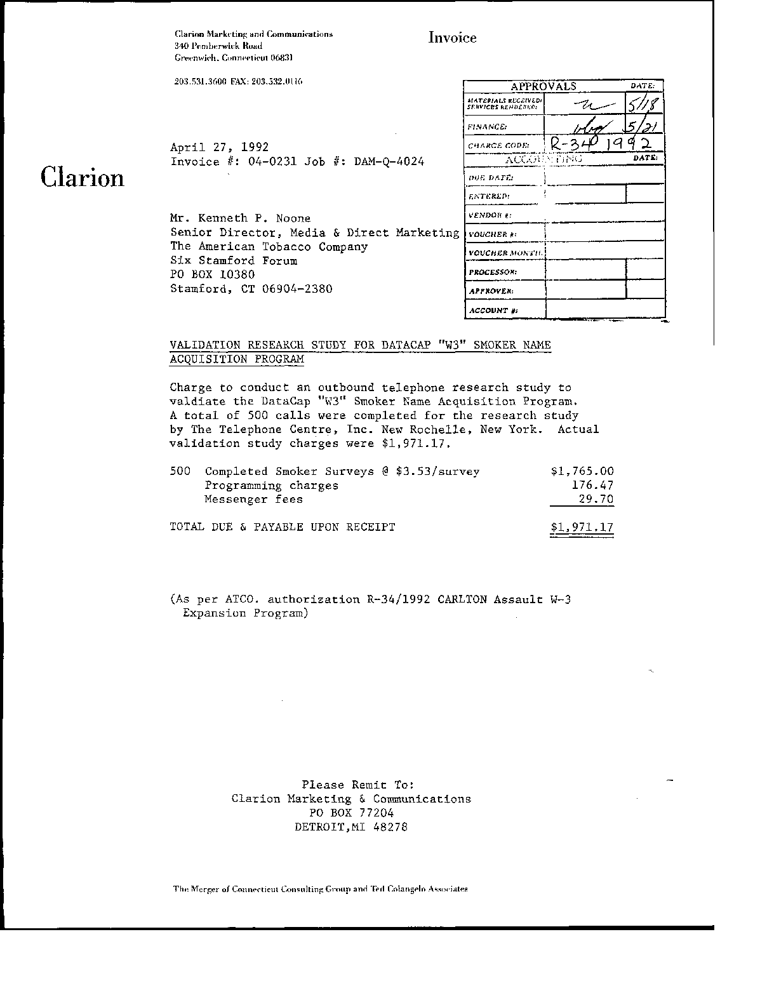

In [ ]:
# lihat gambar tif
from PIL import Image 
im = Image.open(DIREKTORI+"/"+file_tif[idx])
im